# Start Up

Upload the modules

In [1]:
%pip install pandas
%pip install numpy
%pip install -U matplotlib
%pip install scipy
%pip install math
%pip install openpyxl
%pip install scikit-learn
%pip install SALib
%pip install pyDOE
%pip install h5py

Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement math (from versions: none)
ERROR: No matching distribution found for math


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit, minimize
import math as math
import os
import warnings
from sklearn.metrics import r2_score
import copy
import subprocess
from PIL import Image
import scipy.stats as stats
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from SALib.sample import saltelli
from SALib.analyze import sobol
import json
import datetime
from scipy.stats import t
from pyDOE import lhs
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit, minimize
import math as math
import os
import warnings
import copy
import subprocess
from PIL import Image
from scipy.optimize import approx_fprime
import importlib
import textwrap
import sys

In [2]:
#import functions_defined_for_fitting_withpenalty
#from functions_defined_for_fitting_withpenalty import *
#importlib.reload(functions_defined_for_fitting_withpenalty)
from functions_fitting import *

import data_inputs_martijn
from data_inputs_martijn import *
importlib.reload(data_inputs_martijn)


<module 'data_inputs_martijn' from 'D:\\vdSman_Constitutive_Model_Fitting\\data_inputs_martijn.py'>

Martijn Notes

LAOS Data:
data_exp = [ [ [time],[stress],[strain],[shrate] ] , [ [time],[stress],[strain],[shrate] ], ...,   ]

Freq: 1Hz

Side by side experiments in file, variable amount of headers




# Read Data

Some explaianition of the datasets:

**Freq Sweep** <br /> 
data_exp_frswp = [ [ [freq],[G'],[G''] ] , [ [[freq],[G'],[G''] ] ]<br /> 
                           rep1          ,           rep2<br /> 
data_exp_frswp_avg = [ [ [freq],[G'],[G''] ] ] only the average, freq values coming from the rep1<br /> 
std_frq_swp = [ [std for G1],[std for G2] ]

**Amplitude Sweep** <br /> 
data_exp_frswp = [ [ [ampl],[G'],[G''] ] , [ [ampl],[G'],[G''] ] ]<br /> 
                           rep1          ,           rep2<br /> 
data_exp_frswp_avg = [ [ [ampl],[G'],[G''] ] ] only the average, strain values coming from the rep1<br /> 
std_str_swp= [ [std for G1],[std for G2] ]

**LAOS** <br /> 
data_exp = [ [ [time],[stress],[strain],[shrate] ] , [ [time],[stress],[strain],[shrate] ], ...,   ] <br /> 
first 2Hz for each strain(7), replicates contunie in series, then 4Hz each strain(7) and replicates<br /> 
data_exp_avg =  the same above but replicates averaged, hence only one set of strain amplitudes(7) at 2Hz then 4Hz (14 elements total with 4 subseries each) <br /> 
std_all = array containgin std dev in strain for each  amplitude


**Stress Growth** <br /> 
15 shear rates, followed by 15 replictaes.<br /> 
Each element of "data_exp_stgrw" contains 3 sub elements: time, strain, shear rate, each 99 elements<br /> 
"data_exp_stgrw_avg" contains average of replictaes, the same format with 15 averaged values. The strain and time were extractedfrom the first replicate. <br /> 
std_grw = has 15 elements each  containing 99 elements for each of the stress value collected at a certain time/strain for wach given shear rate

## Freq Sweep

### Viscoelastic moduli

In [11]:
#   Inputs
n_header= 81 #header rows just from the begining to the first data
n_rows=11 #number of data points in the measurement
rows_btw_data = 77 #number20 of rows between two measurements
header_list=['Meas. Pts.',	'Frequency',	'Storage Modulus',\
             	'Loss Modulus',	'Damping Factor',	'Complex Viscosity',	'Deflection Angle',	'Torque']
what_to_collect_time_dep= [ 'Frequency', 'Storage Modulus','Loss Modulus', 'Complex Viscosity'  ]
what_to_collect_single_val = []
sheet_name = 'freq_sweep'
sample_list = ['01-frswp-P60-0.60-1', \
               '02-frswp-P60-0.60-2']    

#   Function
data_exp_frswp = read_data1(n_header, n_rows, header_list, what_to_collect_time_dep,\
               path_read, sheet_name, sample_list, rows_btw_data)

print(data_exp_frswp)



[[[0.1, 0.1585, 0.2512, 0.3981, 0.631, 1.0, 1.585, 2.512, 3.981, 6.31, 10.0], [10840, 11740, 12570, 13370, 14190, 15020, 15890, 16780, 17680, 18610, 19630], [2510, 2525, 2576, 2673, 2806, 2951, 3122, 3307, 3503, 3711, 3934], [17700.0, 12060.0, 8132.0, 5450.0, 3648.0, 2437.0, 1626.0, 1084.0, 720.4, 478.5, 318.6]], [[0.1, 0.1585, 0.2512, 0.3981, 0.631, 1.0, 1.585, 2.512, 3.981, 6.31, 10.0], [9588, 10440, 11210, 11940, 12670, 13420, 14170, 14940, 15700, 16480, 17360], [2263, 2265, 2304, 2375, 2466, 2568, 2683, 2818, 2967, 3130, 3305], [15680.0, 10730.0, 7251.0, 4865.0, 3257.0, 2174.0, 1448.0, 963.2, 638.7, 423.2, 281.3]]]


Average the replicates

[[np.float64(10214.0), np.float64(11090.0), np.float64(11890.0), np.float64(12655.0), np.float64(13430.0), np.float64(14220.0), np.float64(15030.0), np.float64(15860.0), np.float64(16690.0), np.float64(17545.0), np.float64(18495.0)], [np.float64(2386.5), np.float64(2395.0), np.float64(2440.0), np.float64(2524.0), np.float64(2636.0), np.float64(2759.5), np.float64(2902.5), np.float64(3062.5), np.float64(3235.0), np.float64(3420.5), np.float64(3619.5)]]
[[np.float64(626.0), np.float64(650.0), np.float64(680.0), np.float64(715.0), np.float64(760.0), np.float64(800.0), np.float64(860.0), np.float64(920.0), np.float64(990.0), np.float64(1065.0), np.float64(1135.0)], [np.float64(123.5), np.float64(130.0), np.float64(136.0), np.float64(149.0), np.float64(170.0), np.float64(191.5), np.float64(219.5), np.float64(244.5), np.float64(268.0), np.float64(290.5), np.float64(314.5)]]
[[[0.1, 0.1585, 0.2512, 0.3981, 0.631, 1.0, 1.585, 2.512, 3.981, 6.31, 10.0], [np.float64(10214.0), np.float64(11090.0)

<ErrorbarContainer object of 3 artists>

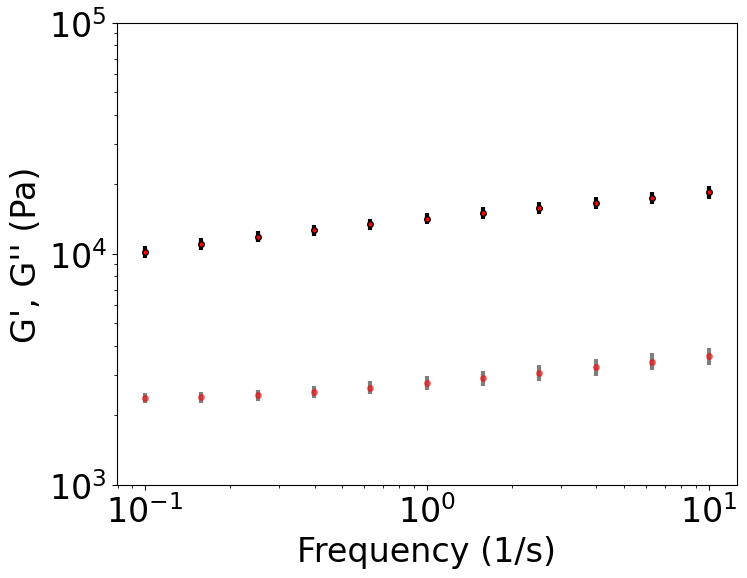

In [6]:
G1rep1 = data_exp_frswp[0][1]
G1rep2 = data_exp_frswp[1][1]

G2rep1 = data_exp_frswp[0][2]
G2rep2 = data_exp_frswp[1][2]

avg = [[],[]]
std_freq_swp = [[],[]]
for i in range(0,len(G1rep1)):
    avg[0].append(np.average([G1rep1[i], G1rep2[i]]))
    avg[1].append(np.average([G2rep1[i], G2rep2[i]]))
    std_freq_swp[0].append(np.std([G1rep1[i], G1rep2[i]]))
    std_freq_swp[1].append(np.std([G2rep1[i], G2rep2[i]]))

print(avg)
print(std_freq_swp)
data_exp_frswp_avg = [[]]
for i in range(0,3):
    if i == 0: data_exp_frswp_avg[0].append(data_exp_frswp[0][0])
    if i == 1: data_exp_frswp_avg[0].append(avg[0])
    if i == 2: data_exp_frswp_avg[0].append(avg[1])
print(data_exp_frswp_avg)

# Create a figure and an array of axes with 1 row and 3 columns
fig, axs = plt.subplots(figsize=(8, 6))
axs.set_xscale('log')
axs.set_yscale('log')


axs.set_xlabel('Frequency (1/s)')
axs.set_ylabel("G', G'' (Pa)")

axs.set_ylim(1e3, 1e5)

axs.errorbar(data_exp_frswp_avg[0][0], data_exp_frswp_avg[0][1], yerr=std_freq_swp[0], marker='o', color='red',\
              label='Data 1', markersize=4, linewidth =0, ecolor = 'black', elinewidth=3, markeredgecolor='black')
axs.errorbar(data_exp_frswp_avg[0][0], data_exp_frswp_avg[0][2], yerr=std_freq_swp[1], marker='o', color=color_palette[0],\
              label='Data 1', markersize=4, linewidth =0, ecolor = 'black', elinewidth=3, alpha =0.5)



### Waveform Data

In [10]:
#Inputs
n_header= 82 #header rows just from the begining to the first data
n_rows=ndata_cycle*len(freqvals_frfit) #number of data points in the measurement
rows_btw_data = 77 #number of rows between two measurements
header_list=['Meas. Pts.',	'Frequency',	'Angular Frequency',	'Strain',	'Shear Stress', 'Phase Angle', 'Period Time', \
             'Raw Value Strain', 'Raw Value Shear Rate', 'Raw Value Shear Stress']
what_to_collect_time_dep= ['Period Time', 'Raw Value Shear Stress','Raw Value Strain','Raw Value Shear Rate'  ]
what_to_collect_single_val = []
sheet_name = 'freq_swp_waveform'
sample_list = ['01-frswp-P60-0.60-1',\
               '02-frswp-P60-0.60-2',\
               '03-frswp-P60-0.60-3']    
#Function
data_exp_frswp_waveform = read_data(n_header, n_rows, header_list, what_to_collect_time_dep,what_to_collect_single_val,\
               path_read, sheet_name, sample_list, rows_btw_data,cyclesdata, ndata_percycle)


Average the replicates

In [ ]:
rep1 = data_exp_frswp_waveform[0][0][1]
rep2 = data_exp_frswp_waveform[0][1][1]

avg = []
std_freqwaveform = []
for i in range(0,len(rep1)):
    avg.append(np.average([rep1[i], rep2[i]]))
    std_freqwaveform.append(np.std([rep1[i], rep2[i]]))


elem1 = data_exp_frswp_waveform[0][0][0]
elem2 = avg
elem3 = data_exp_frswp_waveform[0][0][2]
elem4 = data_exp_frswp_waveform[0][0][3]
data_exp_frswp_waveform_avg = [[[elem1, elem2, elem3, elem4]]]

fig, axs = plt.subplots(1,3,figsize=(18, 6))

axs[0].set_xlabel('Strain (%)')
axs[1].set_xlabel('Strain (%)')
axs[2].set_xlabel('Strain (%)')
axs[0].set_ylabel("Stress (Pa)")



for i in range(0,len(freqvals_frfit)):
    x= np.multiply(data_exp_frswp_waveform_avg[0][0][2][i*ndata_cycle:(i+1)*ndata_cycle],100)
    if i <= 3:
        axs[0].errorbar(x, data_exp_frswp_waveform_avg[0][0][1][i*ndata_cycle:(i+1)*ndata_cycle], yerr=std_freqwaveform[i*ndata_cycle:(i+1)*ndata_cycle],\
             marker='o', linewidth=0, markersize=3, color=color_palette[i%4], ecolor=color_palette[i], elinewidth = 1,
             label=f'freq:{freqvals_frfit[i]}')
    elif i < 8:
        axs[1].errorbar(x, data_exp_frswp_waveform_avg[0][0][1][i*ndata_cycle:(i+1)*ndata_cycle], yerr=std_freqwaveform[i*ndata_cycle:(i+1)*ndata_cycle],\
             marker='o', linewidth=0, markersize=3, color=color_palette[i%4], ecolor=color_palette[i%3], elinewidth = 1,
             label=f'freq:{freqvals_frfit[i]}')
    else:
        axs[2].errorbar(x, data_exp_frswp_waveform_avg[0][0][1][i*ndata_cycle:(i+1)*ndata_cycle], yerr=std_freqwaveform[i*ndata_cycle:(i+1)*ndata_cycle],\
             marker='o', linewidth=0, markersize=3, color=color_palette[i%3], ecolor=color_palette[i%3], elinewidth = 1,
             label=f'freq:{freqvals_frfit[i]}')
        
axs[0].legend(fontsize=12)
axs[1].legend(fontsize=12)
axs[2].legend(fontsize=12)


## Amplitude Sweep

Martijn's Section

In [3]:
#   Inputs
n_header= 18 #header rows just from the begining to the first data
cols_btw_data = 12 #number20 of rows between two measurements
header_list=['Strain %', "G' [kPa]", "G'' [kPa]", 'G* [kPa]', 'Tan Delta', 'Temperature [°C]', 'Pressure [bar]', "Viscosity n' [Pa*s]", 'Viscosity n" [Pa*s]', 'Viscosity n* [Pa*s]', 'Shear Rate [1/sec]', 'Shear Stress [Pa]']
what_to_collect = ['Strain %', "G' [kPa]", "G'' [kPa]"]#[ 'Strain', 'Storage Modulus','Loss Modulus'  ]
#what_to_collect = ["Shear Stress [Pa]", "Strain %" , "Shear Rate [1/sec]"]


path_read=r"D:\Data\Rheology\CCR\202411 DoE pH T M Alph 8\Overview 1.xls"

sample_index = [0, 1]
sample_name = ['M55 T130 0M', 'M55 T120 0M']

#   Function
infos, data_exp_strswp = read_data_CCR(n_header, header_list, what_to_collect, path_read, cols_btw_data)
data_exp_strswp = [data_exp_strswp[i] for i in sample_index]
print(data_exp_strswp)

[[array([9.70000e-02, 1.25000e-01, 1.62000e-01, 2.10000e-01, 2.71000e-01,
       3.50000e-01, 4.50000e-01, 5.80000e-01, 7.46000e-01, 9.57000e-01,
       1.23000e+00, 1.58300e+00, 2.03700e+00, 2.61800e+00, 3.36900e+00,
       4.32300e+00, 5.54200e+00, 7.10300e+00, 9.11000e+00, 1.16920e+01,
       1.49510e+01, 1.92800e+01, 2.47260e+01, 3.18490e+01, 4.09300e+01,
       5.25290e+01, 6.74840e+01, 8.67740e+01, 1.11382e+02, 1.43119e+02,
       1.83951e+02, 2.36382e+02, 3.03650e+02, 3.90088e+02, 5.01162e+02]), array([78.0733, 90.419 , 89.2075, 84.4456, 83.9087, 81.9941, 79.7185,
       78.6742, 78.0587, 76.7757, 73.8053, 71.3855, 68.7687, 63.8479,
       60.182 , 54.3684, 47.9544, 42.0367, 36.785 , 31.9518, 28.0706,
       23.9061, 20.1956, 16.9   , 13.9606, 11.5892,  9.3743,  7.3663,
        5.6641,  4.1862,  2.8277,  1.8907,  1.3899,  0.924 ,  0.4593]), array([14.042 , 16.5189, 17.7744, 13.7289, 17.1037, 18.5148, 19.355 ,
       18.1195, 17.1598, 17.1877, 18.1082, 18.027 , 16.8179, 18.2601,


Average the replicates

<ErrorbarContainer object of 3 artists>

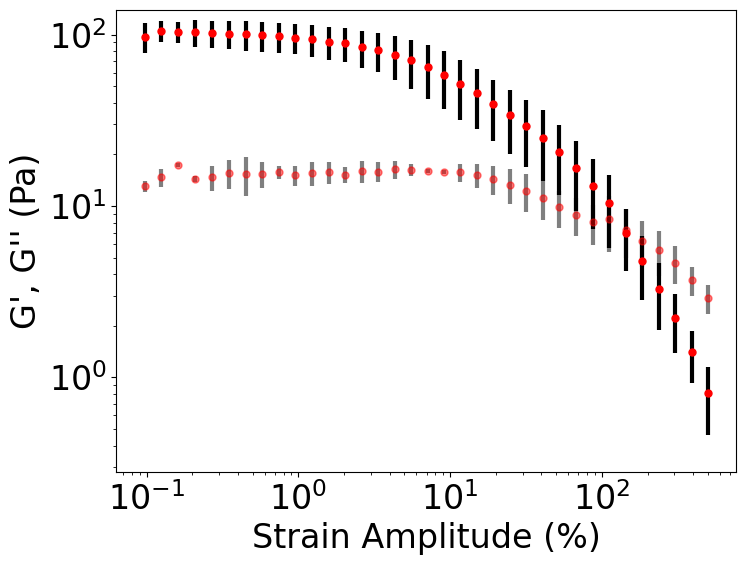

In [4]:
G1rep1 = data_exp_strswp[0][1]
G1rep2 = data_exp_strswp[1][1]

G2rep1 = data_exp_strswp[0][2]
G2rep2 = data_exp_strswp[1][2]

avg = [[],[]]
std_str_swp = [[],[]]
for i in range(0,len(G1rep1)):
    avg[0].append(np.average([G1rep1[i], G1rep2[i]]))
    avg[1].append(np.average([G2rep1[i], G2rep2[i]]))
    std_str_swp[0].append(np.std([G1rep1[i], G1rep2[i]]))
    std_str_swp[1].append(np.std([G2rep1[i], G2rep2[i]]))

data_exp_strswp_avg = [[]]
for i in range(0,3):
    if i == 0: data_exp_strswp_avg[0].append(data_exp_strswp[0][0])
    if i == 1: data_exp_strswp_avg[0].append(avg[0])
    if i == 2: data_exp_strswp_avg[0].append(avg[1])

# Create a figure and an array of axes with 1 row and 3 columns
fig, axs = plt.subplots(figsize=(8, 6))
axs.set_xscale('log')
axs.set_yscale('log')

axs.set_xlabel('Strain Amplitude (%)')
axs.set_ylabel("G', G'' (Pa)")

#axs.set_ylim(1e2, 1e5)

axs.errorbar(data_exp_strswp_avg[0][0], data_exp_strswp_avg[0][1], yerr=std_str_swp[0], marker='o', color=color_palette[0],\
              label='Data 1', markersize=5, linewidth =0, ecolor = 'black', elinewidth=3)
axs.errorbar(data_exp_strswp_avg[0][0], data_exp_strswp_avg[0][2], yerr=std_str_swp[1], marker='o', color=color_palette[0],\
              label='Data 1', markersize=5, linewidth =0, ecolor = 'black', elinewidth=3, alpha =0.5)




## LAOS

In [4]:
#   Inputs
ndata_cycle = 35
n_header= 18 #header rows just from the begining to the first data
cols_btw_data = 12 #number20 of rows between two measurements
header_list=['Strain %', "G' [kPa]", "G'' [kPa]", 'G* [kPa]', 'Tan Delta', 'Temperature [°C]', 'Pressure [bar]', "Viscosity n' [Pa*s]", 'Viscosity n" [Pa*s]', 'Viscosity n* [Pa*s]', 'Shear Rate [1/sec]', 'Shear Stress [Pa]']

what_to_collect = ["index", "Shear Stress [Pa]", "Strain %" , "Shear Rate [1/sec]"]


path_read=r"D:\Data\Rheology\CCR\202411 DoE pH T M Alph 8\Overview 1.xls"

sample_index = [0, 1]
sample_name = ['M55 T130 0M', 'M55 T120 0M']

infos, data_exp = read_data_CCR(n_header, header_list, what_to_collect, path_read, cols_btw_data)
data_exp = [data_exp[i] for i in sample_index]
data_exp_avg = data_exp
print(data_exp)


[[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34]), array([   76.914,   115.151,   147.71 ,   179.87 ,   231.767,   294.229,
         369.316,   468.32 ,   596.076,   752.846,   934.769,  1165.514,
        1441.982,  1738.944,  2116.044,  2479.757,  2831.718,  3208.182,
        3629.448,  4072.775,  4607.721,  5122.037,  5605.257,  6132.452,
        6644.391,  7236.202,  7754.917,  8180.115,  8706.14 ,  9305.242,
        9667.208, 10218.808, 11382.089, 12197.032, 12024.912]), array([9.70000e-02, 1.25000e-01, 1.62000e-01, 2.10000e-01, 2.71000e-01,
       3.50000e-01, 4.50000e-01, 5.80000e-01, 7.46000e-01, 9.57000e-01,
       1.23000e+00, 1.58300e+00, 2.03700e+00, 2.61800e+00, 3.36900e+00,
       4.32300e+00, 5.54200e+00, 7.10300e+00, 9.11000e+00, 1.16920e+01,
       1.49510e+01, 1.92800e+01, 2.47260e+01, 3.18490e+01, 4.09300e+01,
       5.25290e+01, 6.74840e+01, 8.67740e+01, 

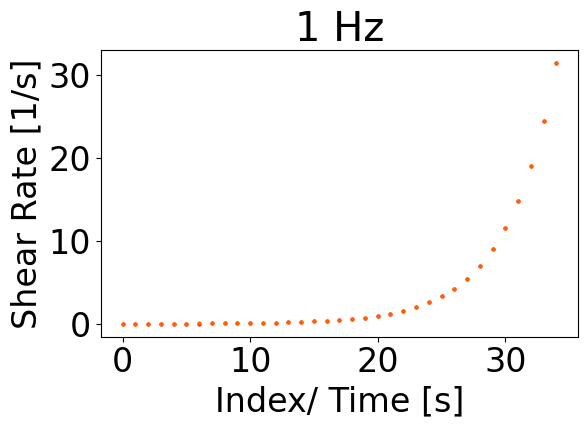

In [8]:
# Create a figure and an array of axes with 1 row and 3 columns
fig, axs = plt.subplots()

axs.set_xlabel('Index/ Time [s]')

axs.set_ylabel('Shear Rate [1/s]')

axs.set_title('1 Hz')



for i in range(len(data_exp)):
    x1 = data_exp[i][0]
    y1 = data_exp[i][3]

    # Plot data in the first subplot
    axs.plot(x1, y1, marker='o', color=color_palette[i], label='Data 1', markersize=2, linewidth =0)



# Adjust layout for better spacing
plt.tight_layout()


# freq = 1
# ampl = 120
# t = np.linspace(0,1/freq,ndata_cycle)
# strains = []
# shrates =[]
# for elem in t:
#     shrate = ampl/100 * freq*2*math.pi * np.cos(freq*elem*2*math.pi)
#
#     strain = ampl/100 * np.sin(freq*elem*2*math.pi)
#     strains.append(strain)
#     shrates.append(shrate)
# axs.plot(t, shrates, marker='o', color='blue', markersize=0, linewidth =1)



# Display the plots
plt.show()

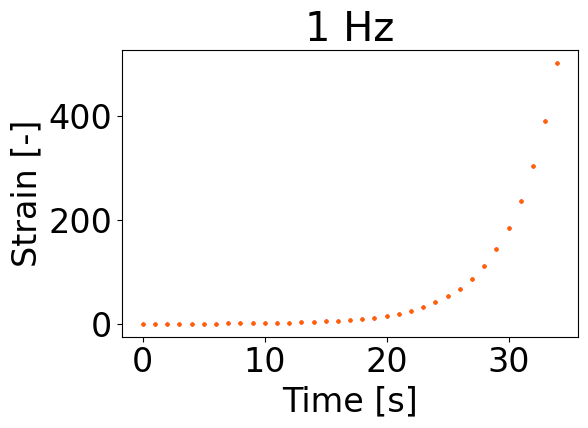

In [12]:
# Create a figure and an array of axes with 1 row and 3 columns
fig, axs = plt.subplots()

axs.set_xlabel('Time [s]')

axs.set_ylabel('Strain [-]')

axs.set_title('1 Hz')

data_exp_avg = data_exp

for i in range(len(data_exp)):

    x1 = data_exp[i][0]
    y1 = data_exp[i][2]


    # Plot data in the first subplot
    axs.plot(x1, y1, marker='o', color=color_palette[i], label='Data 1', markersize=2, linewidth =0)



# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()

Average the replicates

In [ ]:
# We dont have replicates

In [ ]:
for i in range(0,7):
    has_nan = any(math.isnan(x) for x in data_exp[i+28][1])
    print(has_nan) 

Plot with errorbars

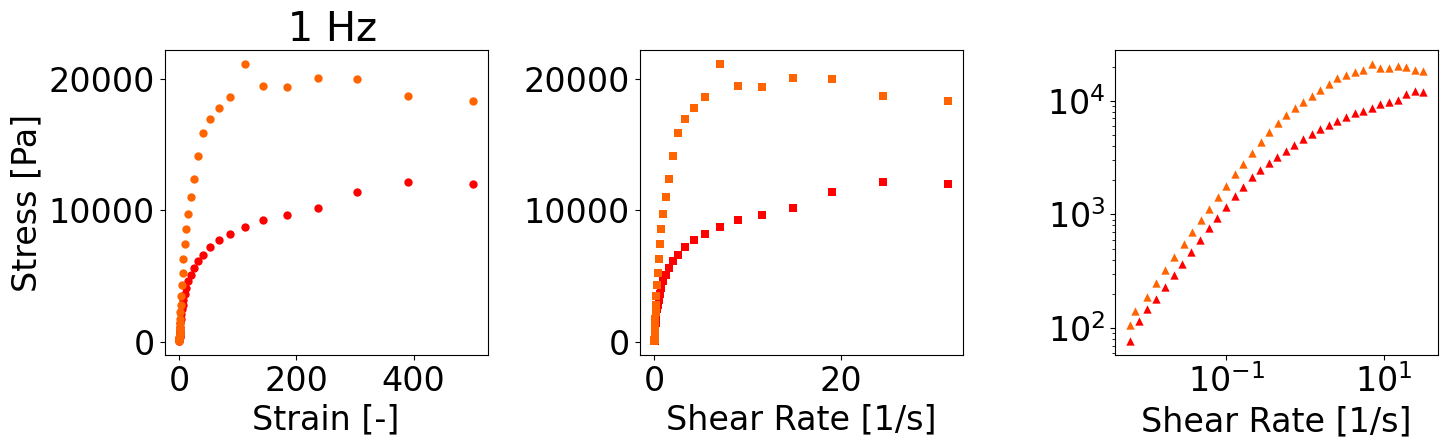

In [16]:
# Create a figure and an array of axes with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs[2].set_xscale('log')
axs[2].set_yscale('log')



axs[0].set_xlabel('Strain [-]')
axs[1].set_xlabel('Shear Rate [1/s]')
axs[2].set_xlabel('Shear Rate [1/s]')
axs[0].set_ylabel('Stress [Pa]')
axs[0].set_title(' 1 Hz')

data_exp_avg = data_exp

for i in range(len(data_exp)):

    lim1 = 0
    lim2 = ndata_cycle

    x1 = data_exp_avg[i][2]
    y1 = data_exp_avg[i][1]

    x2 = data_exp_avg[i][3]
    y2 = data_exp_avg[i][1]

    x3 = data_exp_avg[i][3][lim1:lim2]
    y3 = data_exp_avg[i][1][lim1:lim2]



    # Plot data in the first subplot
    axs[0].scatter(x1, y1, marker='o', color=color_palette[i], label='Data 1', linewidth =0)

    # Plot data in the second subplot
    axs[1].scatter(x2, y2, marker='s', color=color_palette[i], label='Data 2', linewidth =0 )

    # Plot data in the third subplot
    axs[2].scatter(x3, y3, marker='^', color=color_palette[i], label='Data 3', linewidth =0)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()


## Stress Growth

In [ ]:
#   Inputs
n_header= 105 #header rows just from the begining to the first data
n_rows=99 #number of data points in the measurement
rows_btw_data = 68 #number20 of rows between two measurements
header_list=[ 'Meas. Pts.','Time', 'Strain', 'Shear Rate', 'Shear Stress',\
            'Torque', 'Normal Force', 'Viscosity', 'Status']
what_to_collect_time_dep= ['Time', 'Strain', 'Shear Stress'  ]
what_to_collect_single_val = []
sheet_name = 'STEADY'

sample_list = ['01-growth-P60-0.60-0.063',\
               '02-growth-P60-0.60-0.100',\
               '03-growth-P60-0.60-0.170',\
               '04-growth-P60-0.60-0.280',\
               '05-growth-P60-0.60-0.450',\
               '06-growth-P60-0.60-0.730',\
               '07-growth-P60-0.60-1.20',\
               '08-growth-P60-0.60-1.96',\
               '09-growth-P60-0.60-3.21',\
               '10-growth-P60-0.60-5.25',\
               '11-growth-P60-0.60-8.58',\
               '12-growth-P60-0.60-14.1',\
               '13-growth-P60-0.60-23.0',\
               '14-growth-P60-0.60-37.0',\
               '15-growth-P60-0.60-61.0',\
               '16-growth-P60-0.60-0.063',\
               '17-growth-P60-0.60-0.100',\
               '18-growth-P60-0.60-0.170',\
               '19-growth-P60-0.60-0.280',\
               '20-growth-P60-0.60-0.450',\
               '21-growth-P60-0.60-0.730',\
               '22-growth-P60-0.60-1.20',\
               '23-growth-P60-0.60-1.96',\
               '24-growth-P60-0.60-3.21',\
               '25-growth-P60-0.60-5.25',\
               '26-growth-P60-0.60-8.58',\
               '27-growth-P60-0.60-14.1',\
               '28-growth-P60-0.60-23.0',\
               '29-growth-P60-0.60-37.0',\
               '30-growth-P60-0.60-61.0',\
               ]  
 

#   Function
data_exp_stgrw= read_data1(n_header, n_rows, header_list, what_to_collect_time_dep,\
               path_read, sheet_name, sample_list, rows_btw_data)

Get the average of replicates

In [ ]:
first_rep = []
second_rep = []
i=0
for elem in data_exp_stgrw:
    # elem[1]: strain
    # elem[2]: stress

    if i < 15: # there are 15 shear rates
        first_rep.append(elem[2])
    if i >= 15:
        second_rep.append(elem[2])
    i+=1

avg = []
std_strgrw = []
for n in range(0,len(first_rep)):
    avg_elem = []
    std_elem = []
    for m in range(0,len(first_rep[n])):
        array = [first_rep[n][m], second_rep[n][m]]
        avg_val = np.average(array)
        std_val = np.std(array)
        avg_elem.append(avg_val)
        std_elem.append(std_val)
    
    avg.append(avg_elem)
    std_strgrw.append(std_elem)

data_exp_stgrw_avg = []

for i in range(0,len(str_grw_shear_rates)):
    elem = []
    for k in range(0,3):
        if k == 0: elem.append(data_exp_stgrw[i][0])
        if k == 1: elem.append(data_exp_stgrw[i][1])
        if k == 2: elem.append(avg[i])
    data_exp_stgrw_avg.append(elem)


fig, axs = plt.subplots(figsize=(8, 5))
axs.set_xscale('log')
axs.set_yscale('log')
axs.set_xlabel('Strain (-)')
axs.set_ylabel('Stress (Pa)')

i=0
for elem in range(0,len(data_exp_stgrw_avg)):
    axs.errorbar(data_exp_stgrw_avg[i][1],data_exp_stgrw_avg[i][2], yerr=std_strgrw[i],\
                  label='$\dot{{\gamma}}$={:1.2f}'.format(str_grw_shear_rates[i]), marker='o', markersize = 0,\
                  color=color_palette[i], ecolor='black')

    i+=1
axs.legend(fontsize=8)



To do: \
Include errorbars in new plots

# Write Data

In [ ]:
varname_list = []
for var_name in dir():
    # Skip private/internal variables
    if not var_name.startswith('_'):
        var_value = eval(var_name)
        
        # Check if the variable is a NumPy array (or any other array-like type)
        if isinstance(var_value, (np.ndarray, list)):
            varname_list.append(var_name)

varname_list_sorted = sorted(varname_list)

for k in range(0, len(varname_list_sorted)):
    text = f"'{varname_list_sorted[k]}',"
    print(text)



In [ ]:
#get current time
current_time = datetime.datetime.now()
formatted_time = current_time.strftime('%Y_%m_%d_%H_%M')

export_items= [
'data_exp_avg',
'data_exp_frswp_avg',
'data_exp_frswp_waveform_avg',
'data_exp_stgrw_avg',
'data_exp_strswp_avg',
'std_all',
'std_freq_swp',
'std_freqwaveform',
'std_str_swp',
'std_strgrw',
]

# Open a new file to store variables
with open(f'data_reading/arrays_{formatted_time}_humanreadable.py', 'w') as f:
    for var_name in dir():
        # Skip private/internal variables
        if not var_name.startswith('_'):
            var_value = eval(var_name)
            
            # Check if the variable is a NumPy array (or any other array-like type)
            if isinstance(var_value, (np.ndarray, list)):

                if var_name in export_items:
                    # Write variable assignment to the file
                    text1 = f'{var_name} = {repr(var_value)}'
                    f.write(textwrap.fill(text1, width=80))
                    f.write('\n')

np.savez(f'data_reading/arrays_{formatted_time}.npz', **{name: eval(name) for name in export_items})
